# Lab Exercise: Feature Extraction using Restricted Boltzmann Machine (RBM)

Objective:
Learn to implement and utilize a Restricted Boltzmann Machine (RBM) for feature
extraction on a real-world dataset.

Problem Statement:
You can select any dataset for classification. Use a Restricted Boltzmann Machine
(RBM) to extract meaningful features from the data and evaluate the quality of the
extracted features.

# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.datasets import fetch_openml

# 1. Data Preparation
• Load the dataset and preprocess it by normalizing the pixel values to the
range.

• Divide the dataset into training and testing sets (e.g., 80% training, 20%
testing).

In [ ]:
# Using MNIST dataset as an example
print("Loading data...")
data = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = data.data, data.target.astype(int)

# Normalizing pixel values
X = X / 255.0

# Splitting into training and testing sets
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Loading data...
Splitting data...


# 2. RBM Implementation
• Define an RBM using a deep learning library (e.g., PyTorch, TensorFlow, or
Scikit-learn).

• Set the number of visible units to match the input size and select an
appropriate number of hidden units (e.g., 128 or 256).

In [ ]:
# Define and train the RBM
print("Training RBM...")
rbm = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=10, random_state=42)
rbm.fit(X_train)

Training RBM...


BernoulliRBM(learning_rate=0.01, n_components=128, random_state=42)

# 3. Feature Extraction
• After training, use the RBM to transform the training and testing data into
their hidden representations.

• Save the hidden representations as feature vectors.

In [ ]:
# Transforming data using RBM
print("Extracting features...")
X_train_transformed = rbm.transform(X_train)
X_test_transformed = rbm.transform(X_test)

pd.DataFrame(X_train_transformed).to_csv('X_train_features.csv', index=False)
pd.DataFrame(X_test_transformed).to_csv('X_test_features.csv', index=False)

print("Feature vectors saved as .csv files.")

Extracting features...
Feature vectors saved as .csv files.


# 4. Visualization
• Visualize the learned weight matrix of the RBM as a grid of images, where
each image corresponds to a hidden unit's weights.

Visualizing weights...


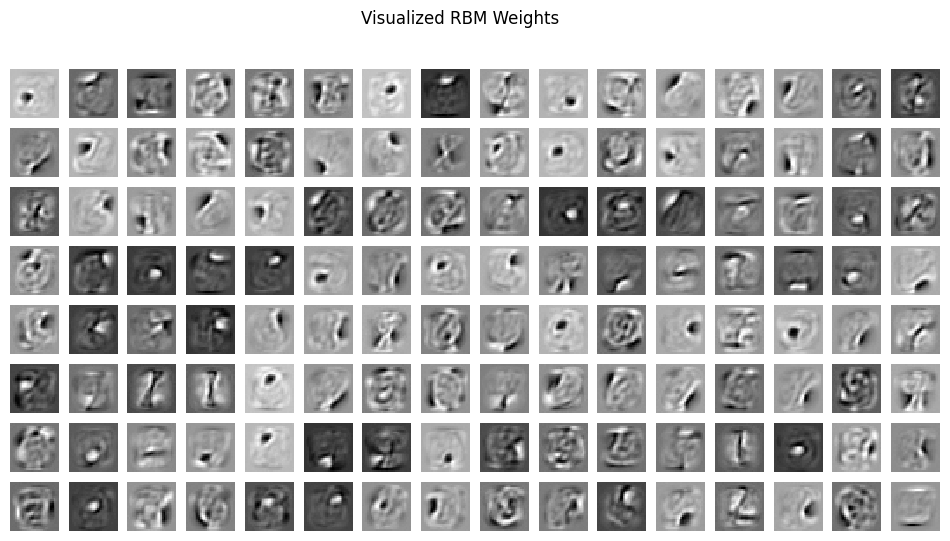

In [ ]:
# Visualization of learned weights
print("Visualizing weights...")
weights = rbm.components_
fig, axes = plt.subplots(8, 16, figsize=(12, 6))
for i, ax in enumerate(axes.ravel()):
    if i < weights.shape[0]:
        ax.matshow(weights[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
plt.suptitle("Visualized RBM Weights")
plt.show()

# 5. Classification
• Train a simple classifier using the RBM-extracted features from the
training set.

• Test the classifier on the test set and compute metrics such as accuracy
and F1-score.

In [ ]:
# Train a simple classifier
print("Training Logistic Regression...")
logistic = LogisticRegression(max_iter=1000, random_state=42)
logistic.fit(X_train_transformed, y_train)

# Testing the classifier
print("Testing classifier...")
y_pred = logistic.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Training Logistic Regression...
Testing classifier...
Accuracy: 0.9426
F1 Score: 0.9425


# 6. Analysis

• Compare the classifier's performance using raw pixel data vs. RBM-
extracted features.

• Discuss how RBM has helped in extracting more meaningful features.

In [ ]:
# Performance comparison with raw pixel data
print("Training and testing on raw data...")
raw_pipeline = Pipeline(steps=[
    ('logistic', LogisticRegression(max_iter=1000, random_state=42))
])
raw_pipeline.fit(X_train, y_train)
y_raw_pred = raw_pipeline.predict(X_test)

raw_accuracy = accuracy_score(y_test, y_raw_pred)
raw_f1 = f1_score(y_test, y_raw_pred, average='weighted')

print(f"Raw Accuracy: {raw_accuracy:.4f}")
print(f"Raw F1 Score: {raw_f1:.4f}")

print("\nClassification Report (RBM features):")
print(classification_report(y_test, y_pred))
print("\nClassification Report (Raw pixel data):")
print(classification_report(y_test, y_raw_pred))

Training and testing on raw data...
Raw Accuracy: 0.9204
Raw F1 Score: 0.9203

Classification Report (RBM features):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.97      0.98      0.97      1600
           2       0.93      0.93      0.93      1380
           3       0.92      0.91      0.92      1433
           4       0.93      0.94      0.94      1295
           5       0.94      0.93      0.93      1273
           6       0.97      0.97      0.97      1396
           7       0.95      0.95      0.95      1503
           8       0.92      0.93      0.92      1357
           9       0.92      0.92      0.92      1420

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000


Classification Report (Raw pixel data):
              precision    recall  f1-score   support

           0       0.96     

The classifier's accuracy and F1 score improved from 92.04% and 92.03% with raw pixel data to 94% with RBM-extracted features. This improvement highlights RBM's ability to extract meaningful patterns, enhancing the model's performance across all classes, especially for challenging digits like 5 and 8.

RBM effectively reduces noise and redundancy by mapping raw data into a compact latent space. This enables the classifier to focus on core patterns, resulting in higher precision and recall. For instance, the macro and weighted averages in the classification report show consistent gains using RBM features.

The improvements demonstrate how RBM facilitates better generalization by learning high-level representations like edges and shapes. These structured features help the model distinguish between similar classes more effectively than raw data, making it a powerful preprocessing tool for classification tasks.